<a href="https://colab.research.google.com/github/rawar/tensorflow-notebooks/blob/master/m3_time_series_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip uninstall tensorflow-gpu==2.0.0-alpha0

In [1]:
#!pip install tensorflow-gpu==2.0.0-alpha0
pip install tf-nightly-gpu

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [0]:
from pandas_datareader import data

In [0]:
tickers = 'AAPL'

start_date = '1980-12-01'
end_date = '2018-12-31'

stock_data = data.get_data_yahoo(tickers, start_date, end_date)

In [5]:
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.515625,0.513393,0.513393,0.513393,117258400.0,0.023007
1980-12-15,0.488839,0.486607,0.488839,0.486607,43971200.0,0.021807
1980-12-16,0.453125,0.450893,0.453125,0.450893,26432000.0,0.020206
1980-12-17,0.464286,0.462054,0.462054,0.462054,21610400.0,0.020706
1980-12-18,0.477679,0.475446,0.475446,0.475446,18362400.0,0.021307


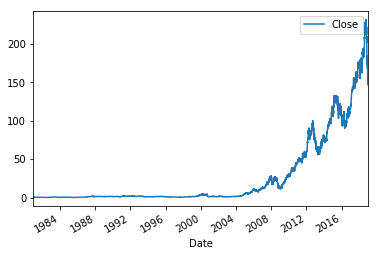

In [6]:
stock_data_frame = stock_data[["Close"]]
stock_data_frame.plot()

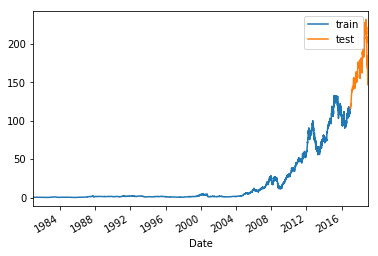

In [7]:
split_date = pd.Timestamp('01-01-2017')
train = stock_data_frame.loc[:split_date]
test = stock_data_frame.loc[split_date:]
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])


In [0]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [0]:

X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [0]:

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [0]:
import tensorflow as tf

In [12]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(7, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

W0510 12:56:40.933606 140257868326784 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/200
9091/9091 [==============================] - 40s 4ms/sample - loss: 5.2537e-05
Epoch 2/200
9091/9091 [==============================] - 39s 4ms/sample - loss: 5.3693e-04
Epoch 3/200
9091/9091 [==============================] - 38s 4ms/sample - loss: 1.0988e-04
Epoch 4/200
9091/9091 [==============================] - 39s 4ms/sample - loss: 6.4580e-05
Epoch 5/200
9091/9091 [==============================] - 37s 4ms/sample - loss: 5.3046e-05
Epoch 6/200
9091/9091 [==============================] - 39s 4ms/sample - loss: 4.8637e-05
Epoch 7/200
9091/9091 [==============================] - 37s 4ms/sample - loss: 4.6627e-05
Epoch 8/200
9091/9091 [==============================] - 39s 4ms/sample - loss: 4.5539e-05
Epoch 9/200
9091/9091 [==============================] - 38s 4ms/sample - loss: 4.5307e-05
Epoch 10/200
9091/9091 [==============================] - 40s 4ms/sample - loss: 4.3494e-05
Epoch 11/200
9091/9091 [==============================] - 38s 4ms/sample - loss: 4.2959e-

In [0]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [14]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

The R2 score on the Train set is:	0.862
The Adjusted R2 score on the Train set is:	0.862

The R2 score on the Test set is:	0.349
The Adjusted R2 score on the Test set is:	0.347


In [0]:
model_lstm.save('LSTM_NonShift.h5')

In [17]:
model_lstm = tf.keras.models.load_model('LSTM_NonShift.h5')

W0510 14:02:16.845632 140257868326784 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Orthogonal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0510 14:02:16.847959 140257868326784 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0510 14:02:17.036863 140257868326784 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is de

In [18]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

501/501 [==============================] - 1s 2ms/sample - loss: 0.0253


In [19]:
print('LSTM: %f'%score_lstm)

LSTM: 0.025260


In [0]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

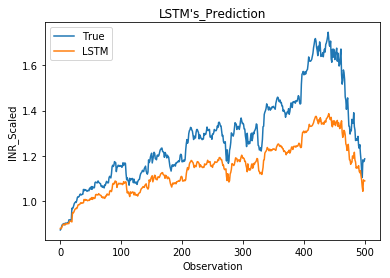

In [21]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()